# AI and Machine Learning CA1 (regression)

Name: Kendrick Slamat

Class: DAAA/FT/1B/03

Admin No: p2510877

# Task Overview

The goal of this project is to build a regression model that can accurately predict **house sale prices** based on various features such as size, number of rooms, building age, and location-related attributes.

### Why This Problem Matters
Predicting house prices is important for:
- Helping buyers and sellers estimate fair market value  
- Supporting real-estate agents and developers in decision making  
- Understanding which features most strongly influence housing value  


This notebook explores the full machine learning workflow, including data analysis, preprocessing, model training, evaluation, and final model selection.

# Learning Objectives

Within this assignment, I will be creating a regression model with the proper supervised machine learning workflow.

-   Data Loading and Cleaning: Loading datasets from files and handling missing values, duplicates, and inconsistencies to ensure data quality.

-   Data Visualization: Using numpy, pandas, matplotlib and seaborn to further analyse relationships between data and view distributions with different plots to gain a visual understanding of the data.

-   Data Preprocessing: Using numpy and pandas to read data, analyse features, prepare data by cleaning and formatting data for the model to understand.

-   Model Hyperparameter Tuning: Using scikit-learn to use different algorithms and experiment with different hyperparameters to see which works best for the model to do well and train data with the highest appropriate accuracy.

-   Evaluation Metrics: Using scikit-learn, matplotlib and seaborn to evaluate data using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score to gain a better understanding of how well different algorithms perform using the same dataset.

-   Feature Analysis: Find out which features are the most important and significantly impact the outcome of the model.

Firstly, we will import all used methods from the libraries used: scikit-learn, numpy, pandas, matplotlib and seaborn.


In [25]:
# Import necessary libaries to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import copy
import warnings
from catppuccin import PALETTE
warnings.filterwarnings("ignore")
flavour = PALETTE.mocha
# Create a color palette to be used for matplotlib and seaborn
sns.set_palette([c.hex for c in flavour.colors])
plt.style.use(flavour.identifier) 
sns.set_theme(
        context="notebook",
        style="darkgrid",
        rc={
            "figure.facecolor": flavour.colors.mantle.hex,
            "axes.facecolor": flavour.colors.base.hex,
            "axes.edgecolor": flavour.colors.surface0.hex,
            "grid.color":     flavour.colors.surface1.hex,
            "text.color":        flavour.colors.text.hex,
            "axes.labelcolor":   flavour.colors.text.hex,
            "xtick.color":       flavour.colors.subtext0.hex,
            "ytick.color":       flavour.colors.subtext0.hex,
        },
    )


# Step 1: Data Loading

#### Extracting Data from the CSV file

We will be extracting data from the dataset given from the CSV file. We will then do a little preview and primer of the key features of this dataset. This will allow us to identify the data types and type of variables that are within this dataset. It also tells us useful information on the number of rows of our dataset, and shows us how a few rows of our dataset would look like.


In [26]:
# Load the dataset, Change file path according to dataset file path
df = pd.read_csv("datasets/housing_price_data.csv")

In [27]:
# Show info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [28]:
# Show first few rows of dataset
df.head()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


In [29]:
# Show last few rows of dataset
df.tail()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000
544,544,Chicago,385.0,3,1,2,unfurnished,175000


In [30]:
# Show a description of numerical features
df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


In [31]:
print("Summary of Dataset: ")
print(f"Total Samples: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print(f"\nFeature Types:")
print(df.dtypes.value_counts())
print(f"\nTarget Variable (Price $) Range:")
print(f"  Minimum: ${df['Price ($)'].min():,.2f}")
print(f"  Maximum: ${df['Price ($)'].max():,.2f}")
print(f"  Mean: ${df['Price ($)'].mean():,.2f}")
print(f"  Median: ${df['Price ($)'].median():,.2f}")

Summary of Dataset: 
Total Samples: 545
Total Features: 8

Feature Types:
int64      5
object     2
float64    1
Name: count, dtype: int64

Target Variable (Price $) Range:
  Minimum: $175,000.00
  Maximum: $1,330,000.00
  Mean: $476,672.92
  Median: $434,000.00


## Reflection

We took a quick look at the dataset through various pandas methods such as head, describe and info. This tells us a lot of useful information about the dataset. From this alone, we can conclude that the dataset itself has 545 rows of data. We are also exposed to a preview of the data, and we can see a mix of numerical and categorical features. In the future, we will be dealing with data on a more deeper level, by analyzing data trends and identifying potential pitfalls that could cause our model to perform worse than expected.


# Step 2: Data Cleaning

#### Explanatory Data Analysis (EDA)

We can see that our dataset gives us 8 features to work with, with the target feature to be "Price ($)".
We can see that the dataset also yields different features with different data types.
Based on the data, we can categorize and determine if the features are necessary to help the model in its predictions.

Dataset Overview:

    House ID: A unique identifier for each house. (number, discrete)

    City: The city where the house is located. (string, nominal)

    House Area (sqm): The total area of the house in square meters. (number, continuous)

    No. of Bedrooms: The number of bedrooms in the house. (number, discrete)

    No. of Toilets: The number of toilets in the house. (number, discrete)

    Stories: The number of floors/stories in the house. (number, discrete)

    Renovation Status: The furnishing condition of the house - furnished, semi-furnished, or unfurnished. (string, ordinal)

    Price ($): The sale price of the house in dollars - this is our target variable for prediction. (number, continuous)

Let's proceed by checking if our dataset contains any missing values.


In [32]:
# Copy dataframe for later use
ori_df = copy.deepcopy(df)
df.isnull().sum()

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

There is no missing data within our dataset! Let's try to check for duplicates in our entire dataset.


In [33]:
# Check for duplicates
duplicates = df[df.duplicated()]

if not duplicates.empty: 
    print(duplicates.head(5))
else:
    print("No duplicates found in the Dataset.")

No duplicates found in the Dataset.


#### Dropping Irrelevant columns

Based on our dataset analysis, we found that **House ID** is just a unique identifier for each property and does not help predict house prices. This feature lacks information about the house's characteristics or location that might affect its market value. Including such identifier columns in our machine learning model would only add unnecessary complexity without improving predictions. Therefore, we will remove the House ID column from our dataset to focus on features that help to predict price.


In [34]:
# Drop House ID as it does not benefit our model
df = df.drop("House ID",axis=1)

In [35]:
df.head()

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000


We have identified two categorical features in our dataset which need to be converted to numeric values for the regression model. These categorical features are:

1. City (Chicago, Denver, Seattle, New York, Boston) - Where the house is located.
2. Renovation Status - Furnishing of the house (furnished, semi-furnished, unfurnished).

The machine learning algorithm requires numeric type of data. Therefore, we need to convert this categorical feature into numeric.
We will apply the following encoding techniques:
• One-Hot Encoding for nominal, categorical features such as City
• Label Encoding/Ordinal Encoding for ordinal type of categorical feature such as Renovation Status unfurnished < semi-furnished < furnished.

By applying this encoding we’ll be converting our categorical text data into numeric values which can be understood by the regression model.


In [36]:
# Use onehotencoder to encode city.
encoder = OneHotEncoder(handle_unknown="ignore")
# First, fit City, a nominal categorical variable, no order is involved.
city_df = df["City"]
encoder.fit(pd.DataFrame(city_df))

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [37]:
# Look at encoded feature names
encoder.categories_

[array(['Boston', 'Chicago', 'Denver', 'New York', 'Seattle'], dtype=object)]

In [38]:
# Transform and add to original dataframe
city_encoded = encoder.transform(pd.DataFrame(df["City"])).toarray()
city_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out())
df = pd.concat((df,city_df),axis=1)

In [39]:
# Drop original city feature
df = df.drop("City",axis=1)

In [40]:
df.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle
0,742.0,4,2,3,furnished,1330000,0.0,1.0,0.0,0.0,0.0
1,896.0,4,4,4,furnished,1225000,0.0,0.0,1.0,0.0,0.0
2,996.0,3,2,2,semi-furnished,1225000,0.0,1.0,0.0,0.0,0.0
3,750.0,4,2,2,furnished,1221500,0.0,0.0,0.0,0.0,1.0
4,742.0,4,1,2,furnished,1141000,0.0,0.0,0.0,1.0,0.0


We have encoded the City categorical variable using one-hot encoding to form 5 new feature columns: City_Boston, City_Chicago, City_Denver, City_New York and City_Seattle, which correspond to the country within the old "City" feature. We have also dropped City to avoid confusion.


In [41]:
# Use ordinalencoder to encode renovation status features.
renovation_order = [["unfurnished","semi-furnished","furnished"]]
encoder = OrdinalEncoder(categories=renovation_order)
# Second, we encode the Renovation Status - an ordinal categorical feature that has order (weight)
renovation_status_df = df["Renovation Status"]
encoder.fit(pd.DataFrame(renovation_status_df))

,categories,"[['unfurnished', 'semi-furnished', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [42]:
# View renovation status categories
encoder.categories_

[array(['unfurnished', 'semi-furnished', 'furnished'], dtype=object)]

In [43]:
# Fit encoded values into original dataset
renovation_encoded = encoder.fit_transform(pd.DataFrame(df["Renovation Status"]))
renovation_status_df = pd.DataFrame(renovation_encoded,columns=encoder.get_feature_names_out())
df = df.drop("Renovation Status",axis=1)
df = pd.concat((df,renovation_status_df),axis=1)

In [44]:
df.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status
0,742.0,4,2,3,1330000,0.0,1.0,0.0,0.0,0.0,2.0
1,896.0,4,4,4,1225000,0.0,0.0,1.0,0.0,0.0,2.0
2,996.0,3,2,2,1225000,0.0,1.0,0.0,0.0,0.0,1.0
3,750.0,4,2,2,1221500,0.0,0.0,0.0,0.0,1.0,2.0
4,742.0,4,1,2,1141000,0.0,0.0,0.0,1.0,0.0,2.0


## Outlier Detection

We will now proceed to detect outliers within our dataset using the Interquartile range (IQR) method.

If the data is outside of the 1.5 _ IQR (lower bound), and 1.5 _ IQR (upper bound), the data point will be considered an outlier.


In [45]:
# Outlier Detection
# Use IQR (interquartile range) to detect outliers. 
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outliers: ")
numerical_cols = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Price ($)']
for col in numerical_cols:
    count, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Outliers detected: {count} ({count/len(df)*100:.1f}%)")
    print(f"  Valid range: {lower:.2f} to {upper:.2f}")

Outliers: 

House Area (sqm):
  Outliers detected: 12 (2.2%)
  Valid range: -54.00 to 1050.00

No. of Bedrooms:
  Outliers detected: 12 (2.2%)
  Valid range: 0.50 to 4.50

No. of Toilets:
  Outliers detected: 1 (0.2%)
  Valid range: -0.50 to 3.50

Stories:
  Outliers detected: 41 (7.5%)
  Valid range: -0.50 to 3.50

Price ($):
  Outliers detected: 15 (2.8%)
  Valid range: -3500.00 to 920500.00


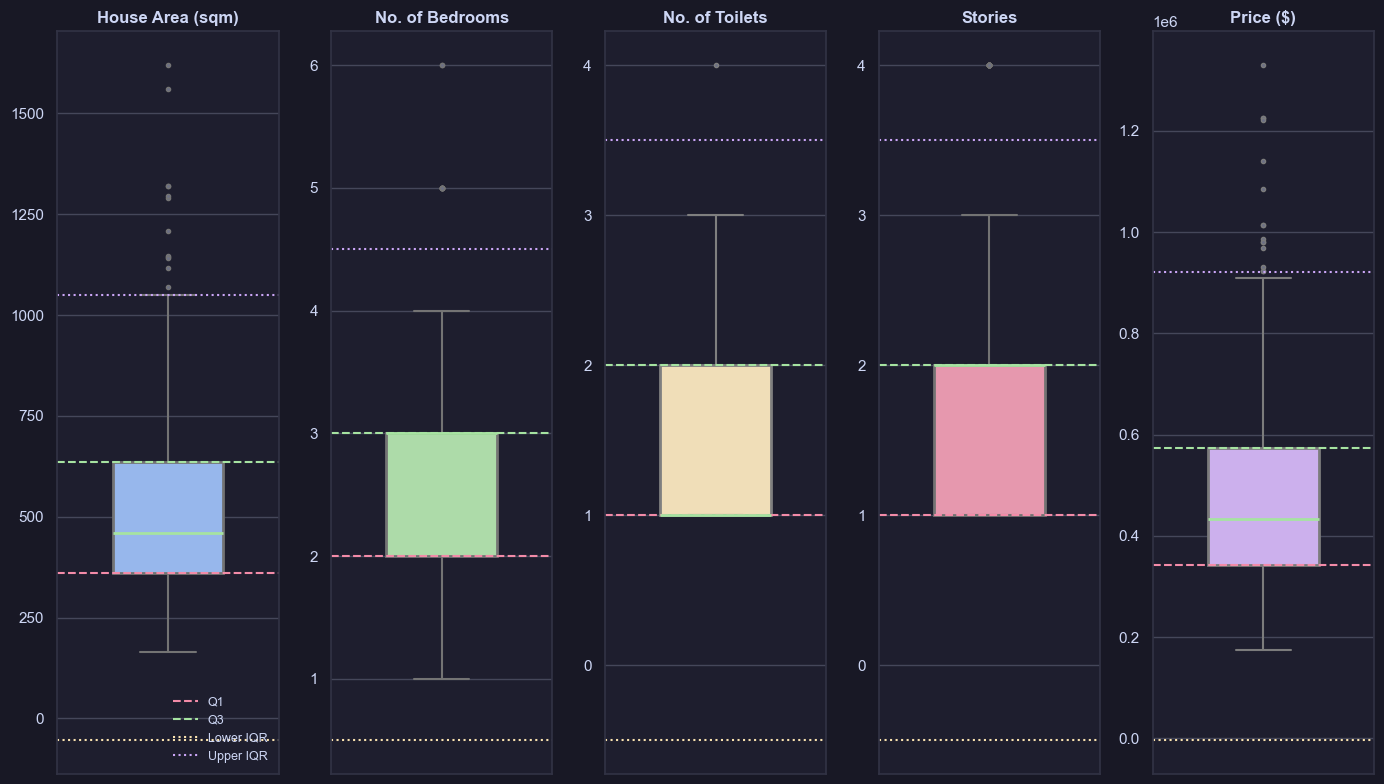

In [46]:
# Boxplots with IQR whiskers for each numerical feature, using different colors for each boxplot
box_colors = [
    flavour.colors.blue.hex,
    flavour.colors.green.hex,
    flavour.colors.yellow.hex,
    flavour.colors.red.hex,
    flavour.colors.mauve.hex
]
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(
        y=df[col],
        color=box_colors[i % len(box_colors)],
        fliersize=3,
        width=0.5,
        boxprops=dict(linewidth=2),
        medianprops=dict(color=flavour.colors.green.hex, linewidth=2),
        whiskerprops=dict(linewidth=1.5),
        capprops=dict(linewidth=1.5)
    )
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    plt.axhline(Q1, color=flavour.colors.red.hex, linestyle='--', linewidth=1.5, label='Q1' if i == 0 else "")
    plt.axhline(Q3, color=flavour.colors.green.hex, linestyle='--', linewidth=1.5, label='Q3' if i == 0 else "")
    plt.axhline(lower_bound, color=flavour.colors.yellow.hex, linestyle=':', linewidth=1.5, label='Lower IQR' if i == 0 else "")
    plt.axhline(upper_bound, color=flavour.colors.mauve.hex, linestyle=':', linewidth=1.5, label='Upper IQR' if i == 0 else "")
    plt.title(col, fontsize=12, fontweight='bold')
    plt.ylabel('')
    if i == 0:
        plt.legend(loc='lower right', fontsize=9, frameon=False)
plt.tight_layout()
plt.show()


We will keep these outliers as it can tell us insightful data about our dataset.


## Reflection

In summary, we performed explanatory data analysis (EDA) on our dataset by checking for missing values and duplicates within the dataset, as well as encoding values using both OneHotEncoder for nominal (categorical) features (in this case city name), as well as OrdinalEncoder for ordinal (categorical) features within our dataset. We gave also checked for outliers within our dataset using the IQR method and chose to retain values as they are important for our data.


# Step 3: Data Visualization

## Data Visualization

In this section, We will be visualizing all our features using matplotlib and seaborn to get a better view of both categorical and numerical features, within a cleaned dataset that has been preprocessed. This will help us better visualise trends, and perform feature engineering to see which variables can be dropped or if any variables have similar relationships, they can be merged.

Let's see how features of the dataset are visualized.


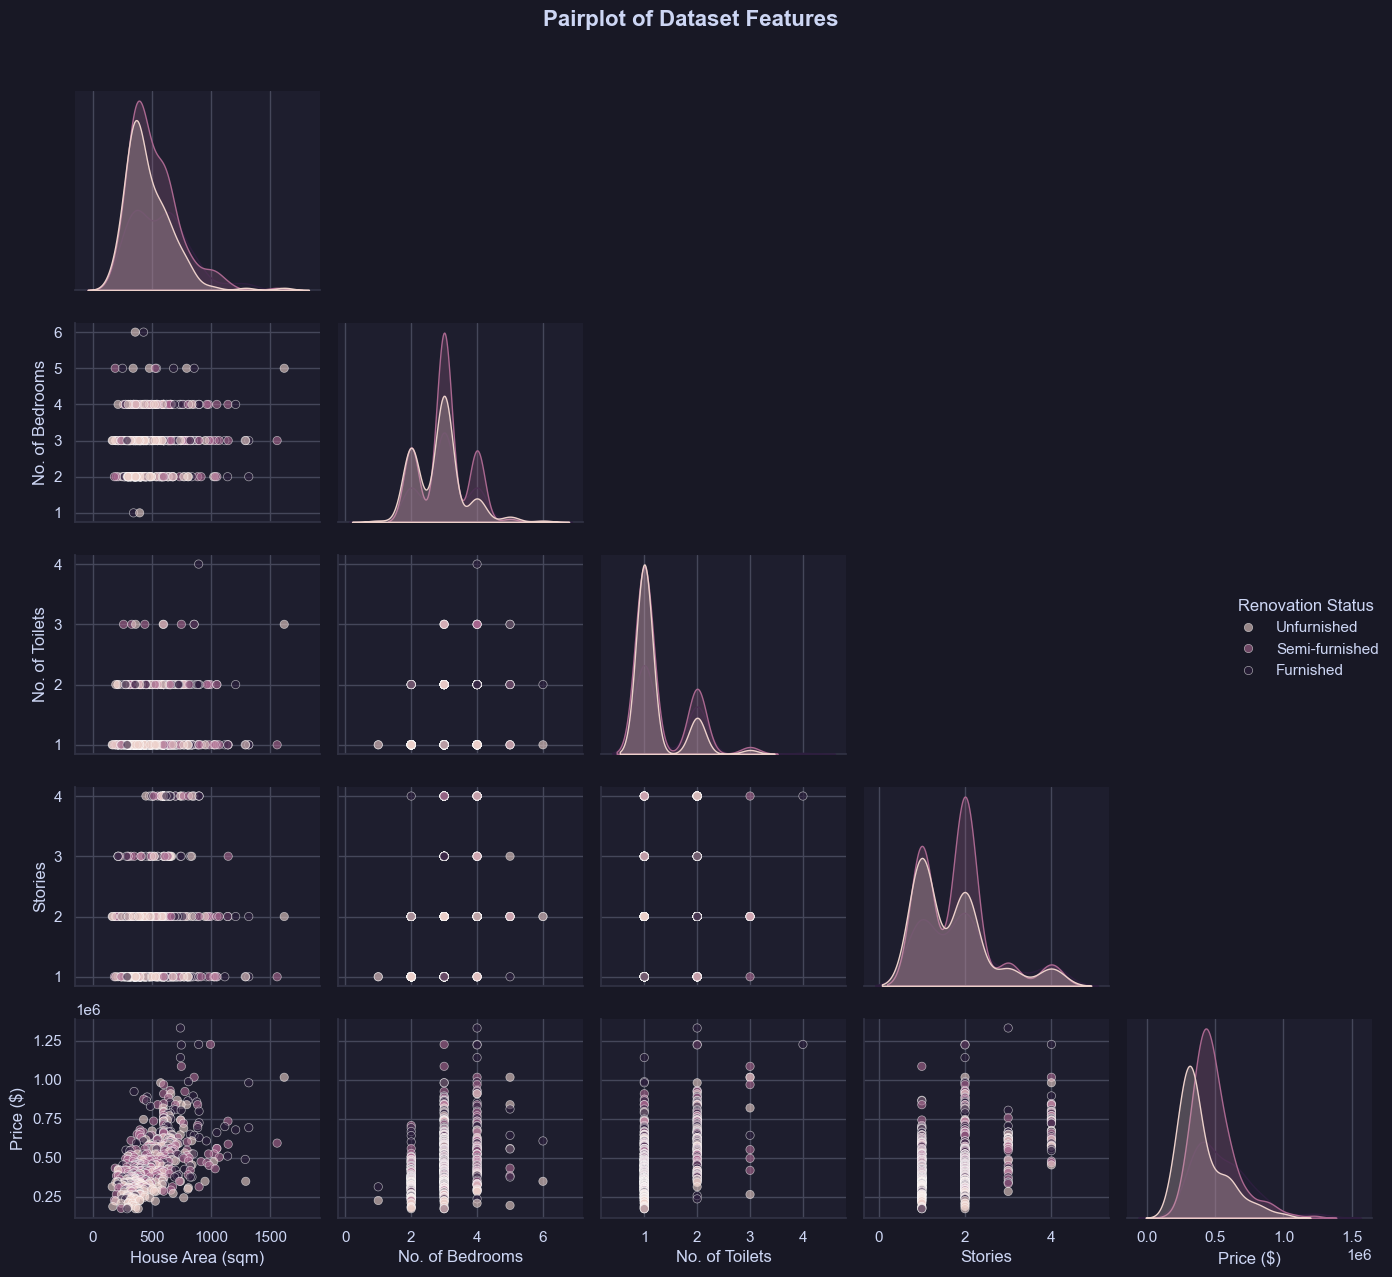

In [47]:
# Construct a pairplot of features to analyse relationships
ax = sns.pairplot(data=df[["House Area (sqm)", "No. of Bedrooms", "No. of Toilets","Stories","Price ($)","Renovation Status"]],corner=True, hue='Renovation Status', plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot of Dataset Features', y=1.02, fontsize=16, fontweight='bold')
ax._legend.texts[0].set_text("Unfurnished")
ax._legend.texts[1].set_text("Semi-furnished")
ax._legend.texts[2].set_text("Furnished")
plt.tight_layout()
plt.show()

This pairplot shows the relations between different features, and the spread of data to see if we can visualize any trends.

Some trends we can see from this plot:

1. **House Area (sqm)** shows a strong positive linear relationship with **Price ($)** - larger houses tend to be more expensive.
2. **No. of Bedrooms** and **No. of Toilets** have a moderate positive correlation with **Price ($)**, indicating that more rooms generally mean higher prices.
3. **Stories** shows some relationship with price.
4. **House Area (sqm)** has a positive correlation with **No. of Bedrooms** and **No. of Toilets**, which makes logical sense - larger houses typically have more rooms.
5. The diagonal KDE plots show that most features have relatively normal distributions, with **Price ($)** showing a slight right skew toward higher values.


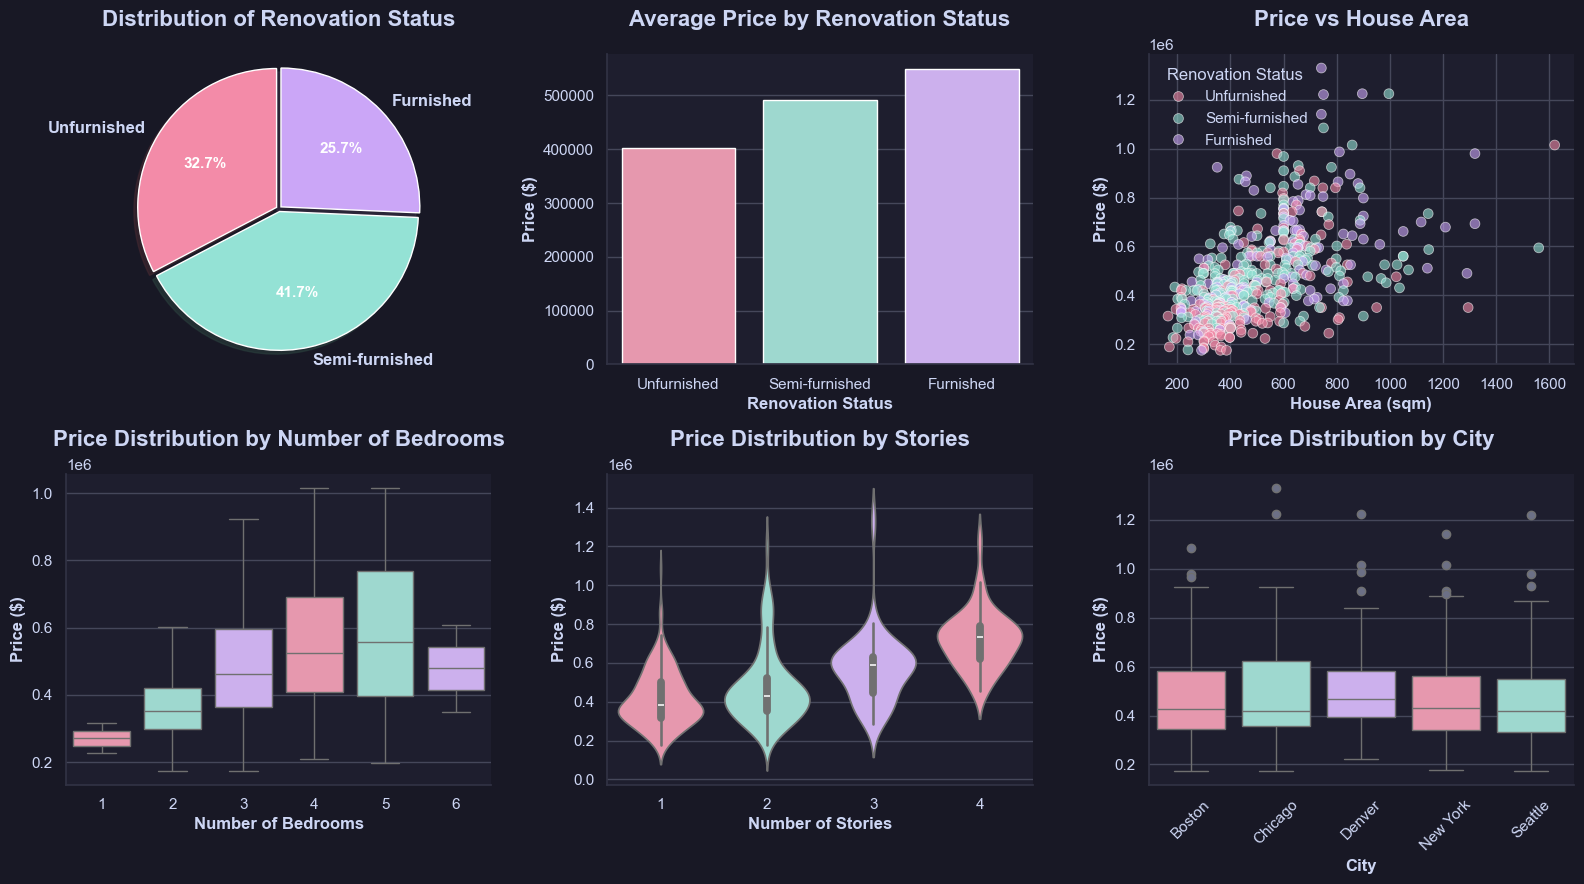

In [48]:
renovation_counts = df['Renovation Status'].value_counts().sort_index()
labels = ['Unfurnished', 'Semi-furnished', 'Furnished']
colors = [flavour.colors.red.hex,flavour.colors.teal.hex,flavour.colors.mauve.hex]
plt.figure(figsize=(16, 9))
# a pie chart showing the distribution of renovaiton status.
plt.subplot(2,3,1)
wedges, texts, autotexts = plt.pie(renovation_counts, labels=labels, autopct='%1.1f%%',colors=colors,startangle=90,explode=(0.02, 0.02, 0.02),shadow=True,textprops={'fontsize': 12, 'weight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')
plt.title('Distribution of Renovation Status', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
# A bar chart showing the average price by renovation status. 
plt.subplot(2,3,2)
sns.barplot(data=df, x='Renovation Status', y='Price ($)', errorbar=None, palette=colors)
plt.title('Average Price by Renovation Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Renovation Status', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.xticks([0, 1, 2], labels)
sns.despine()
# A scatterplot showing the price of house per area.
plt.subplot(2,3,3)
sns.scatterplot(data=df, x='House Area (sqm)', y='Price ($)', hue='Renovation Status', palette=colors, alpha=0.6, s=50)
plt.title('Price vs House Area', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('House Area (sqm)', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
handles, labels_legend = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Renovation Status', frameon=False)
sns.despine()
# Boxplot of the distribution of price by number of bedrooms.
plt.subplot(2,3,4)
sns.boxplot(data=df, x='No. of Bedrooms', y='Price ($)', palette=colors, showfliers=False)
plt.title('Price Distribution by Number of Bedrooms', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Bedrooms', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
sns.despine()
# Violin plot price distribution by stories
plt.subplot(2,3,5)
sns.violinplot(data=df, x='Stories', y='Price ($)', palette=colors, inner='box')
plt.title('Price Distribution by Stories', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Stories', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
sns.despine()
# 5 boxplots on the distribution of price by city.
plt.subplot(2,3,6)
city_columns = ['City_Boston', 'City_Chicago', 'City_Denver', 'City_New York', 'City_Seattle']
city_names = ['Boston', 'Chicago', 'Denver', 'New York', 'Seattle']
city_data = []
for i, col in enumerate(city_columns):
    city_prices = df[df[col] == 1.0]['Price ($)']
    city_data.extend([(price, city_names[i]) for price in city_prices])
city_df_plot = pd.DataFrame(city_data, columns=['Price ($)', 'City'])
sns.boxplot(data=city_df_plot, x='City', y='Price ($)', palette=colors[:5])
plt.title('Price Distribution by City', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()

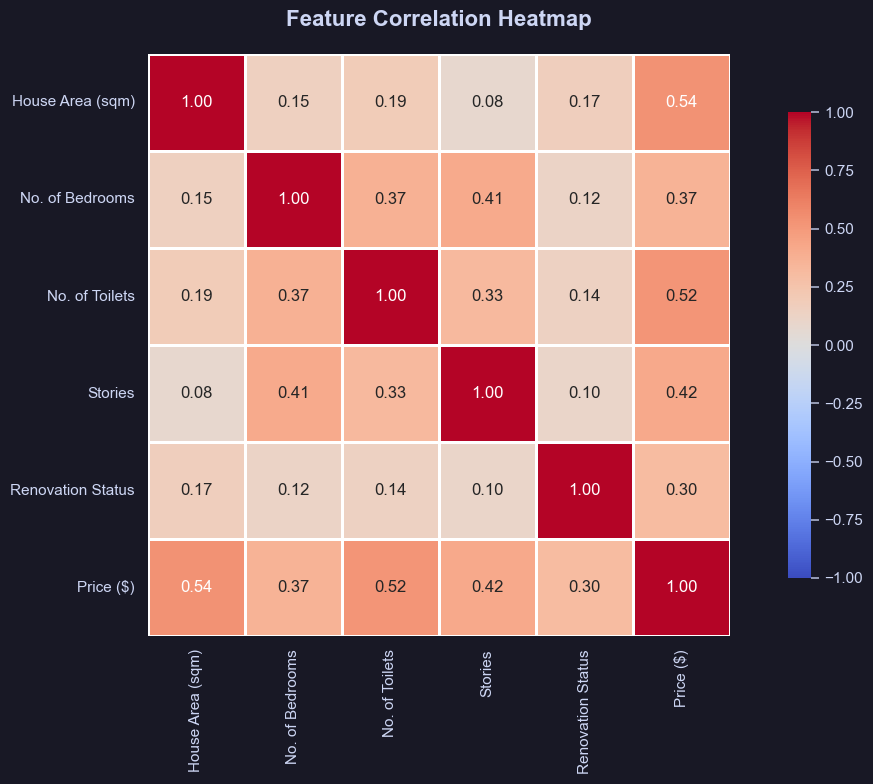

In [49]:
# Correlation Heatmap showing feature relationships
plt.figure(figsize=(12, 8))
corr_features = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Renovation Status', 'Price ($)']
correlation_matrix = df[corr_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=1, cbar_kws={"shrink": 0.8},square=True, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Correlation Heatmap

The correlation heatmap visualizes the relationships between numerical features in our dataset. Each cell shows the correlation coefficient (ranging from -1 to +1) between two features:

-   **Positive correlation (red)**: When one feature increases, the other increases
-   **Negative correlation (blue)**: When one feature increases, the other decreases
-   **No correlation (white)**: Features are independent of each other (Don't affect each other)

Key observations from heatmap:

**Strong Positive Correlations:**

-   **House Area (sqm) ↔ Price ($)**: 0.54 correlation - larger houses command higher prices
-   **No. of Toilets ↔ Price ($)**: 0.52 correlation - more toilets indicate larger, pricier homes
-   **Stories ↔ Price ($)**: 0.42 correlation - multi-story homes tend to be more expensive

**Moderate Positive Correlations:**

-   **No. of Bedrooms ↔ Stories**: 0.41 correlation - taller homes typically have more bedrooms
-   **No. of Bedrooms ↔ No. of Toilets**: 0.37 correlation - homes with more bedrooms usually have more bathrooms
-   **Renovation Status ↔ Price ($)**: 0.30 correlation - furnished properties tend to have higher prices in this dataset

This heatmap helps identify which features are most predictive of house prices and reveals any multicollinearity issues where features are too highly correlated with each other.


## Feature Distribution Plots

Feature distribution plots help us see the distribution of numerical features in a meaningful way. This enables us to tell if the distribution of certain features is skewed or not.


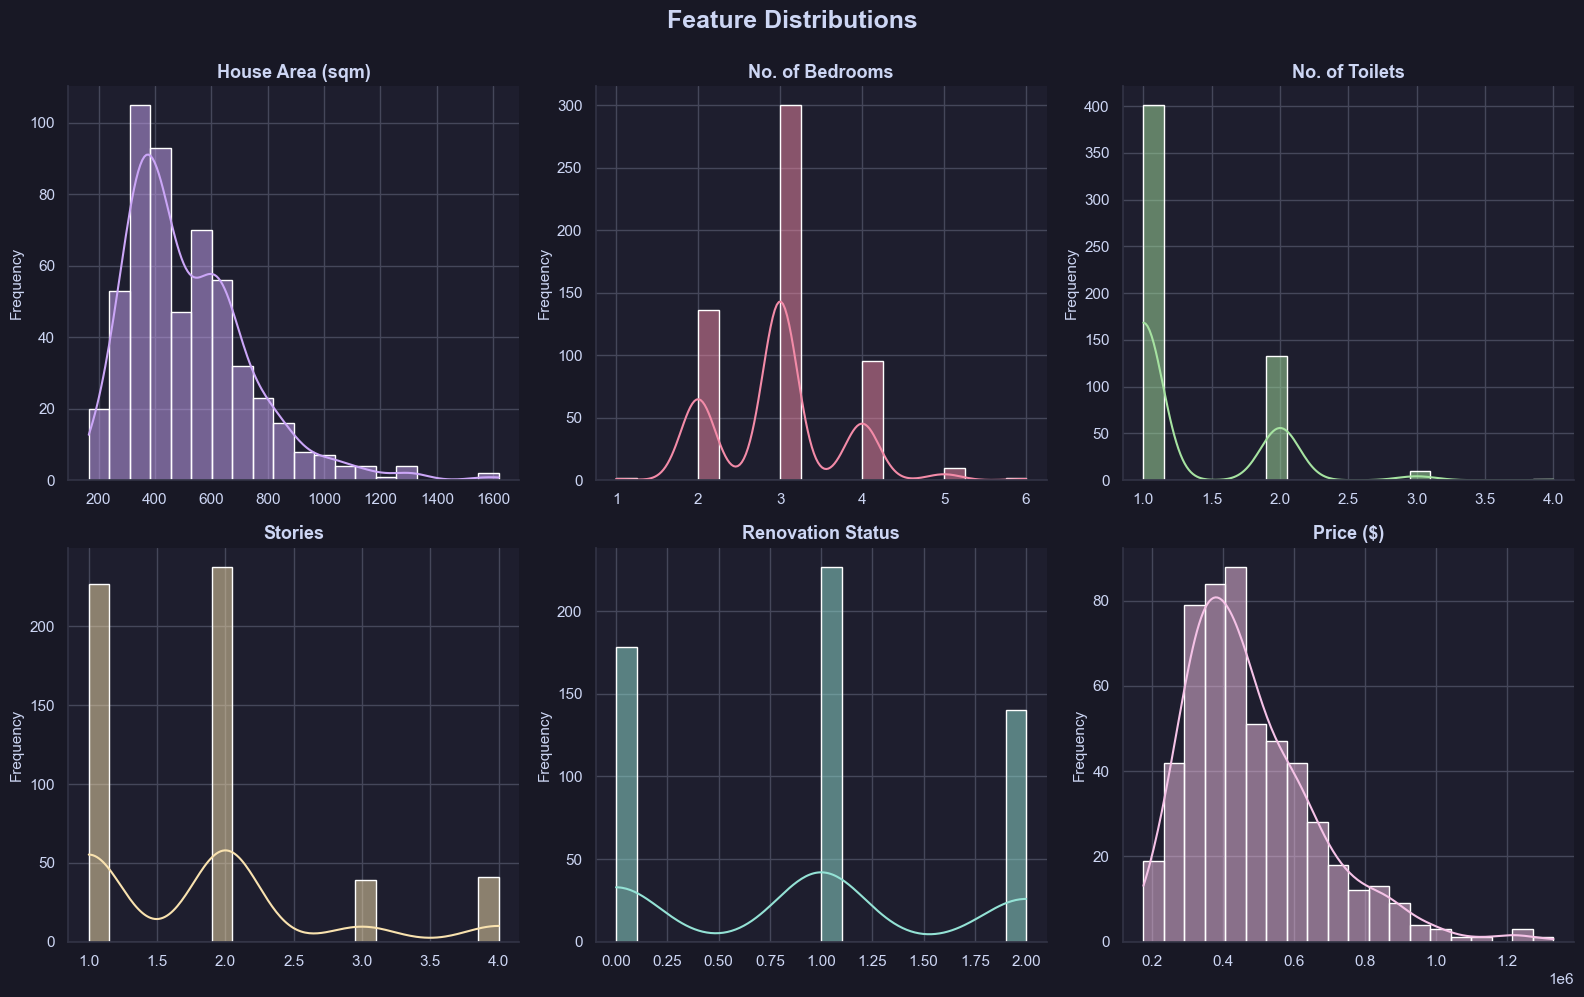

In [50]:
# Create a histogram of the distributions of multiple features.
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Feature Distributions', fontsize=18, fontweight='bold', y=0.995)
numerical_features = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Renovation Status', 'Price ($)']
colors_dist = [flavour.colors.mauve.hex,flavour.colors.red.hex,flavour.colors.green.hex,flavour.colors.yellow.hex,flavour.colors.teal.hex,flavour.colors.pink.hex]
for idx, (feature, color) in enumerate(zip(numerical_features, colors_dist)):
    ax = axes[idx // 3, idx % 3]
    sns.histplot(data=df, x=feature, kde=True, color=color, ax=ax, bins=20)
    ax.set_title(feature, fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency', fontsize=11)
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

As seen earlier, here are the following insights that we can come up with:

-   House area and Price are positively skewed (right-skewed distribution with most values concentrated on the lower end)
-   Most houses have 3-4 bedrooms
-   Renovation status shows furnished properties tend to have lower prices
-   Most houses are semi-furnished , followed by unfurnished and furnished


From data visualization analysis:

**Price Distribution**: Right-skewed distribution with majority priced $400,000-$800,000; outliers exceed $1,000,000.

**Renovation Status**: Semi-furnished (41.7%) most common, followed by unfurnished (32.7%) and furnished (25.7%).

**Feature Correlations**:

-   House Area: Strong positive correlation with price (0.54)
-   Bedrooms: 4-5 bedroom homes command highest prices
-   Toilets: Moderate correlation (0.52) reflecting house size
-   Stories: Multi-story homes (2-3 stories) show higher price distributions

**Location**: Denver exhibits highest median prices with widest range; Chichago shows consistently high prices; display moderate, comparable distributions.

**Model Implications**: All features (House Area, Bedrooms, Toilets, Stories, Renovation Status, City) demonstrate predictive value through clear linear relationships and distinct clustering patterns, suggesting suitability for regression modeling.


# Step 4: Data Preprocessing / EDA

## Data Preprocessing for Regression

Now that we have completed our data visualization and gained insights into the relationships between features and house prices, we need to prepare our data for the regression model.

1. **Split the data** into features (X) and target variable (y)
2. **Create training and testing sets** using an 80-20 split to evaluate model performance
3. **Apply feature scaling** to normalize our numerical features for better model performance

Our target variable is **Price ($)**, and our features include:

-   House Area (sqm)
-   No. of Bedrooms
-   No. of Toilets
-   Stories
-   Renovation Status (encoded)
-   City (one-hot encoded into 5 binary features)

Let's begin by preparing our data for model training.


In [51]:
# Scale Data using StandardScaler to normalize data, with mean = 0 and standard deviation = 1. only applies to numerical features.
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[["House Area (sqm)","No. of Bedrooms","No. of Toilets","Stories"]]),columns=["House Area (sqm)","No. of Bedrooms","No. of Toilets","Stories"])
df = pd.concat((scaled,df[["Price ($)","City_Boston","City_Denver","City_New York","City_Seattle","Renovation Status"]]),axis=1)
df.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Boston,City_Denver,City_New York,City_Seattle,Renovation Status
0,1.046726,1.403419,1.421812,1.378217,1330000,0.0,0.0,0.0,0.0,2.0
1,1.757010,1.403419,5.405809,2.532024,1225000,0.0,1.0,0.0,0.0,2.0
2,2.218232,0.047278,1.421812,0.224410,1225000,0.0,0.0,0.0,0.0,1.0
3,1.083624,1.403419,1.421812,0.224410,1221500,0.0,0.0,0.0,1.0,2.0
4,1.046726,1.403419,-0.570187,0.224410,1141000,0.0,0.0,1.0,0.0,2.0


Since our target variable is skewed as seen from the visualization above (**Price ($)** is positively skewed), we will try to address that issue by appling a _log transform_ using `np.log1p()` to transform data to use a logarithmic scale. This will reduce skew within the graph, and will improve model performance.


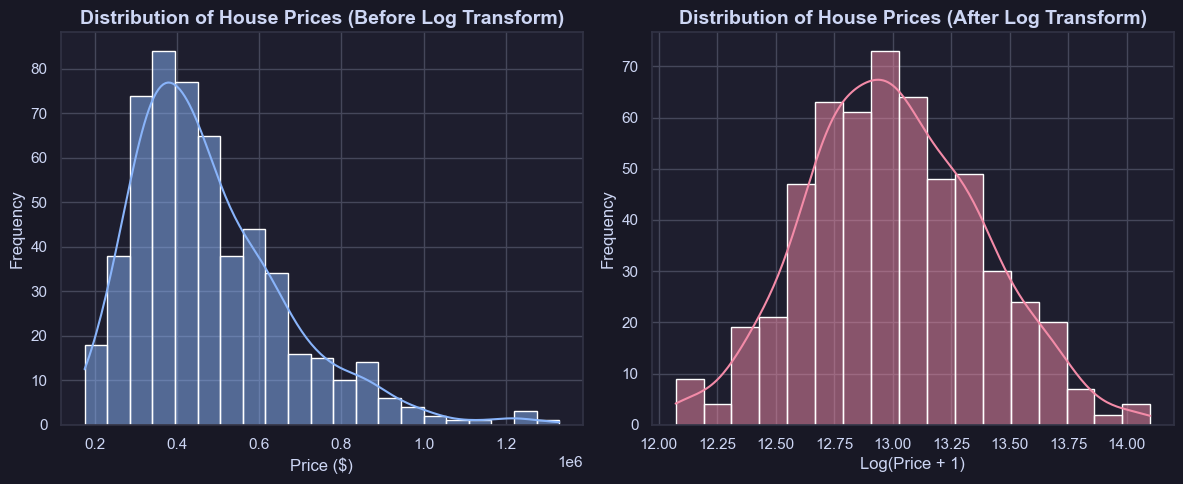

In [52]:
transformer = FunctionTransformer(np.log1p)
log_price = transformer.transform(df["Price ($)"])

# Plot the distribution before log transform
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Price ($)"], kde=True, color=flavour.colors.blue.hex)
plt.title("Distribution of House Prices (Before Log Transform)", fontsize=14, fontweight="bold")
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Plot the distribution after log transform
plt.subplot(1, 2, 2)
sns.histplot(log_price, kde=True, color=flavour.colors.red.hex)
plt.title("Distribution of House Prices (After Log Transform)", fontsize=14, fontweight="bold")
plt.xlabel("Log(Price + 1)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()


Our imbalanced dataset (positively skewed) now has been transformed to become a somewhat normal distribution.

We will now split the model into train and test sets, with training data amounting to about 80% while test data amounting to about 20%.

To prevent data leakage, we will create a pipeline to scale and encode our model only on training data.


In [53]:
transformed_df = copy.deepcopy(ori_df)

X = transformed_df[["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories", "City", "Renovation Status"]]
y = log_price
# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# 3. Define column types
num_features = ["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories"]
cat_nominal = ["City"]
cat_ordinal = ["Renovation Status"]

# 4. Create transformers
ordinal_order = [["unfurnished", "semi-furnished", "furnished"]]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("city", OneHotEncoder(handle_unknown="ignore"), cat_nominal),
    ("reno", OrdinalEncoder(categories=ordinal_order), cat_ordinal)
])

# 5. Fit on train, transform both train and test
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Step 5: Model Evaluation

#### Training the model with different algorithms

We will use multiple algorithms that are commonly used to solve regression problems such as: Linear Regression, Ridge Regression, Random Forest (Regression), Gradient Boosting (Regression), and KNN (Regression).

#### Model Evaluation

We will evaluate the model based on a few metrics, namely: mean squared error, mean absolute error, root mean squared error, r squared.


In [54]:
# Testing different regression models and seeing how they perform, complete with hyperparamter tuning.

models = {
    "Dummy Regressor": DummyRegressor(strategy="mean"),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest" : RandomForestRegressor(random_state=42),
    "Gradient Boosting" : GradientBoostingRegressor(random_state=42),
    "K Nearest Neighbours": KNeighborsRegressor()
}

# Use multiple machine learning models to predict data.
for k, v in models.items():
    model = v
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_pred_original = np.expm1(y_pred)
    print(k)
    print(f"Mean Squared Error (MSE): {round(mean_squared_error(y_test, y_pred), 2)}")
    print(f"Mean Absolute Error (MAE): {round(mean_absolute_error(y_test,y_pred),2)}")
    print(f"Root Mean Square Error (RMSE): {round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}")
    print(f"R-Squared (R2): {round(r2_score(y_test,y_pred),2)}")

Dummy Regressor
Mean Squared Error (MSE): 0.19
Mean Absolute Error (MAE): 0.36
Root Mean Square Error (RMSE): 0.44
R-Squared (R2): -0.0
Linear Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.25
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.52
Ridge Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.25
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.52
Random Forest
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.31
R-Squared (R2): 0.52
Gradient Boosting
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.54
K Nearest Neighbours
Mean Squared Error (MSE): 0.11
Mean Absolute Error (MAE): 0.26
Root Mean Square Error (RMSE): 0.33
R-Squared (R2): 0.42


## Model Performance Analysis

**Linear Regression**

-   **MSE:** 0.09
-   **MAE:** 0.24
-   **RMSE:** 0.30
-   **R²:** 0.53  
    Linear Regression achieves moderate performance, explaining about 52% of the variance in house prices. The errors (MAE and RMSE) indicate that predictions are, on average, 0.25 units away from the actual value. This model serves as a solid baseline and is easy to interpret, but may not capture complex relationships in the data.

**Ridge Regression**

-   **MSE:** 0.09
-   **MAE:** 0.24
-   **RMSE:** 0.30
-   **R²:** 0.53  
    Ridge Regression performs almost identically to Linear Regression. This suggests that regularization (which helps prevent overfitting) does not provide much benefit for this dataset, likely because the features are not highly collinear or the model is not overfitting.

**Random Forest**

-   **MSE:** 0.9
-   **MAE:** 0.23
-   **RMSE:** 0.31
-   **R²:** 0.52 
    Random Forest, an ensemble method, achieves a slightly lower R² than the linear models. While its MAE is marginally better, the overall variance explained is less. This suggests that the default Random Forest settings may not be optimal, or that the relationships in the data are mostly linear.

**Gradient Boosting**

-   **MSE:** 0.09
-   **MAE:** 0.24
-   **RMSE:** 0.30
-   **R²:** 0.54
    Gradient Boosting performs best among all models, achieving the highest R² (0.54) and lowest errors. This indicates it is able to capture some non-linear relationships in the data, making it the most effective model for this regression task.

**K-Nearest Neighbours (KNN)**

-   **MSE:** 0.11
-   **MAE:** 0.26
-   **RMSE:** 0.33
-   **R²:** 0.42
    KNN has the lowest R² and highest RMSE among the models tested. This algorithm is sensitive to feature scaling and may not generalize well for this dataset, especially if the data has complex or high-dimensional relationships.

**Overall:**  
Gradient Boosting slightly outperforms the other models, but the linear models (Linear Regression and Ridge Regression) also perform well. Ensemble methods like Random Forest and KNN do not show significant improvement, suggesting the relationship between features and house prices may be relatively linear, or that further hyperparameter tuning is needed for the ensemble models.


Let us visualize the learning curves for each model.


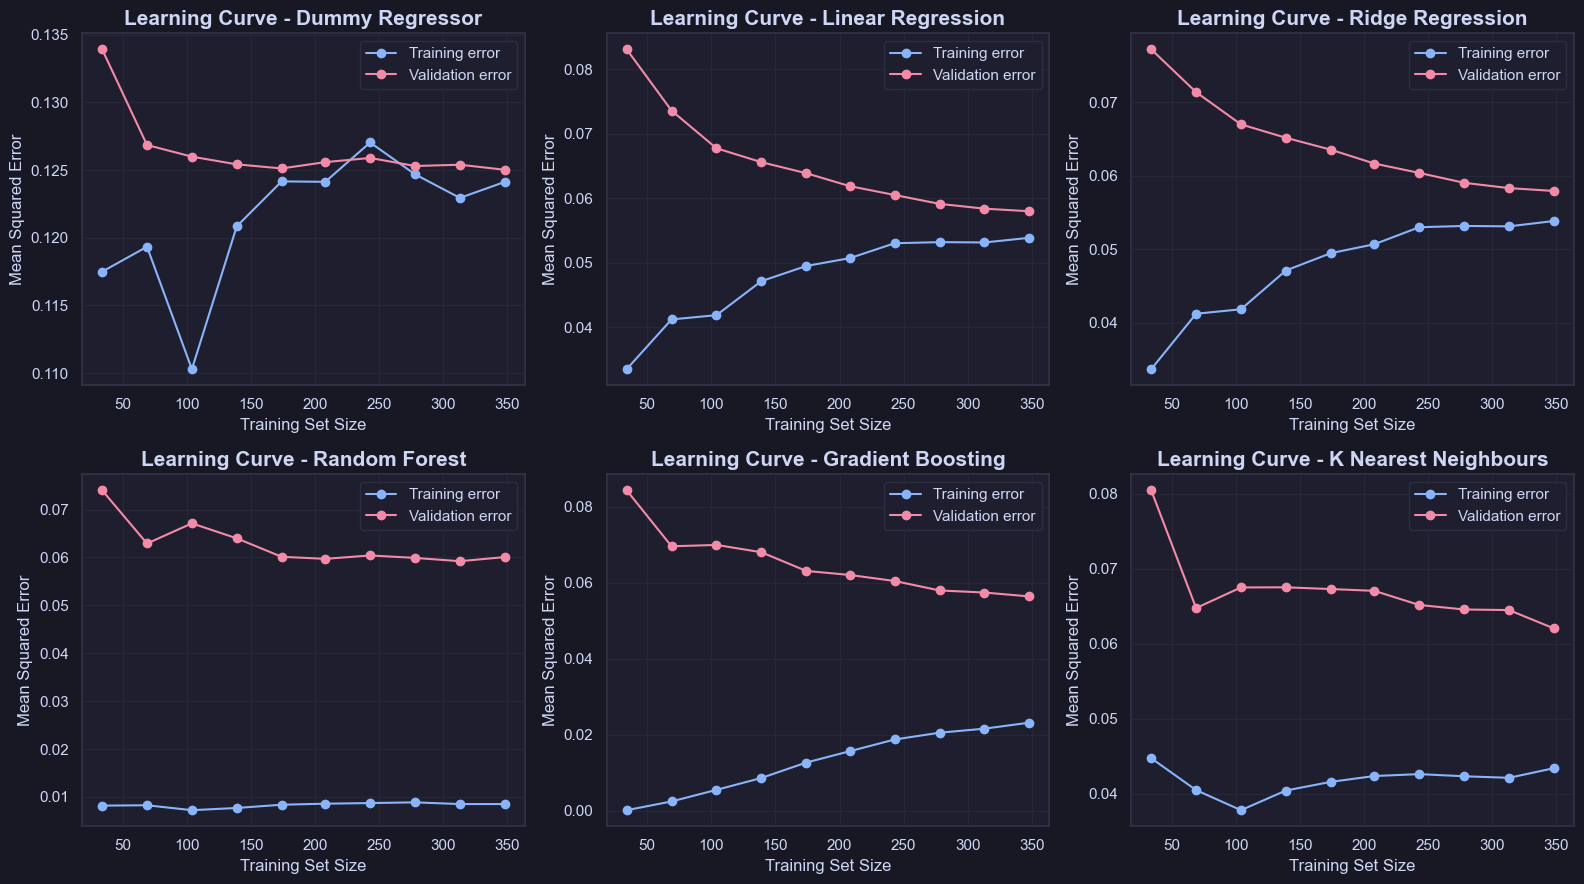

In [55]:
num = 1
# Plot 5 learning curves based on model training error and validation error

plt.figure(figsize=(16,9))
for model in models:
    train_sizes, train_scores, test_scores = learning_curve(
        models[model], X_train_proc, y_train, cv=5,
        scoring="neg_mean_squared_error", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    plt.subplot(2,3,num)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=flavour.colors.blue.hex, label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=flavour.colors.red.hex, label="Validation error")
    plt.title(f"Learning Curve - {model}", fontsize=15, fontweight="bold")
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Mean Squared Error", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.2)
    num += 1
plt.tight_layout()
plt.show()

## Reflection

### Evaluation of Regression Models

We evaluated several regression algorithms on the house price dataset, including Linear Regression, Ridge Regression, Random Forest, Gradient Boosting, and K-Nearest Neighbours. Each model was assessed using key metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

-   **Gradient Boosting** achieved the best performance, with the highest R² score (0.54) and lowest error metrics, indicating it captured both linear and some non-linear relationships in the data.
-   **Linear Regression** and **Ridge Regression** performed similarly, both explaining about 52% of the variance in house prices.
-   **Random Forest** and **KNN** did not outperform the linear models, suggesting the relationships in the data are mostly linear or that further hyperparameter tuning is needed.

### Learning Curves

Learning curve plots showed that all models have a small gap between training and validation errors, indicating low overfitting and good generalization. Gradient Boosting and Ridge Regression showed the most stable learning curves, while KNN had higher variance.

-   **Feature Engineering**: Encoding categorical variables and scaling numerical features improved model performance. The log transformation of the target variable (Price) helped address skewness and improved regression results.
-   **Feature Importance**: House Area, Number of Toilets, and Stories were the most predictive features for house prices, as shown by correlation analysis and model performance.
-   **Model Selection**: Ensemble methods like Gradient Boosting provided a slight edge over linear models, but the improvement was marginal, suggesting the dataset's relationships are primarily linear.


# Step 6: Feature Engineering

#### Feature Engineering

On the previous step, we have obtained Gradient Boosting as the best model to complete our regression problem. We can continue improving and iterating the model by carrying out extensive feature engineering to improve its evaluation metrics, as well as understand its hyperparameters and fine tune the model into a better one. We will now continue the train -> eval -> test loop for hyperparameter tuning to see which parameters can be fine tuned to help our model perform better for this regression problem especially with our imbalanced dataset.


## Feature Correlation Heatmap (Including Categorical Features)

Next, we will plot a heatmap that includes both the numerical and the one-hot encoded categorical features (City and Renovation Status). This will help us visualize the relationships and correlations between all features in the dataset, including the categorical variables after encoding.


In [56]:
df.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Boston,City_Denver,City_New York,City_Seattle,Renovation Status
0,1.046726,1.403419,1.421812,1.378217,1330000,0.0,0.0,0.0,0.0,2.0
1,1.757010,1.403419,5.405809,2.532024,1225000,0.0,1.0,0.0,0.0,2.0
2,2.218232,0.047278,1.421812,0.224410,1225000,0.0,0.0,0.0,0.0,1.0
3,1.083624,1.403419,1.421812,0.224410,1221500,0.0,0.0,0.0,1.0,2.0
4,1.046726,1.403419,-0.570187,0.224410,1141000,0.0,0.0,1.0,0.0,2.0


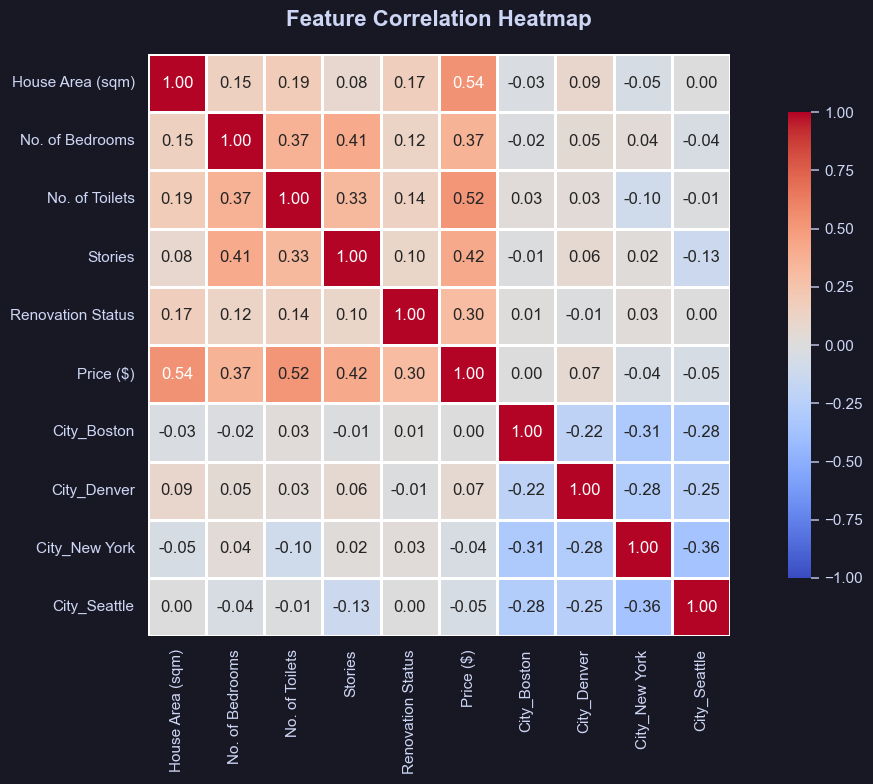

In [57]:
# Another feature correlation heatmap, but this time with with encoded city features
plt.figure(figsize=(12, 8))
corr_features = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Renovation Status', 'Price ($)',"City_Boston","City_Denver","City_New York","City_Seattle"]
correlation_matrix = df[corr_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=1, cbar_kws={"shrink": 0.8},square=True, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

All one-hot encoded city features (City_Boston, City_Denver, City_New York, City_Seattle) show a negative or near-zero correlation with the target variable (Price ($)). This suggests that city location does not provide predictive value for house prices in this dataset. Therefore, these city columns can be dropped from the feature set to simplify the model and potentially improve performance.


## Feature Engineering: Creating the "Total Rooms" Feature

To enhance the predictive power of our regression model, we engineered a new feature called **Total Rooms**. This feature is calculated as the sum of the number of bedrooms and the number of toilets for each house:


Total Rooms = No. of Bedrooms + No. of Toilets


**Rationale:**  
Combining these two related features captures the overall capacity and utility of a house in a single variable, which may better reflect the value buyers place on total available rooms, rather than considering bedrooms and toilets separately.

**Next Steps:**  
We then retrained our regression models using this updated feature set to evaluate whether "Total Rooms" improves model performance compared to using bedrooms and toilets as separate features.

In [58]:
# Create a new feature: Total Number of Rooms (Bedrooms + Toilets)
df["Total Rooms"] = df["No. of Bedrooms"] + df["No. of Toilets"]
df.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Boston,City_Denver,City_New York,City_Seattle,Renovation Status,Total Rooms
0,1.046726,1.403419,1.421812,1.378217,1330000,0.0,0.0,0.0,0.0,2.0,2.825231
1,1.757010,1.403419,5.405809,2.532024,1225000,0.0,1.0,0.0,0.0,2.0,6.809228
2,2.218232,0.047278,1.421812,0.224410,1225000,0.0,0.0,0.0,0.0,1.0,1.469090
3,1.083624,1.403419,1.421812,0.224410,1221500,0.0,0.0,0.0,1.0,2.0,2.825231
4,1.046726,1.403419,-0.570187,0.224410,1141000,0.0,0.0,1.0,0.0,2.0,0.833233


#### Retrain the model with the updated features

Now we'll retrain all our machine learning models using the new feature set that includes the Total Rooms feature. This allows us to compare the performance improvement from our feature engineering approach against the original feature set.


In [59]:
# Split dataset into train and test sets
X = df[["House Area (sqm)","Stories","Renovation Status","Total Rooms"]]
y = log_price
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
# Redefine preprocessor since we dropped city
num_features = ["House Area (sqm)","Stories","Renovation Status","Total Rooms"]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features)
])

# Fit on train, transform both train and test
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Train models with updated features
for k, v in models.items():
    model = v
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_pred_original = np.expm1(y_pred)
    print(k)
    print(f"Mean Squared Error (MSE): {round(mean_squared_error(y_test, y_pred),2)}")
    print(f"Mean Absolute Error (MAE): {round(mean_absolute_error(y_test,y_pred),2)}")
    print(f"Root Mean Square Error (RMSE): {round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}")
    print(f"R-Squared (R2): {round(r2_score(y_test,y_pred),2)}")

Dummy Regressor
Mean Squared Error (MSE): 0.19
Mean Absolute Error (MAE): 0.36
Root Mean Square Error (RMSE): 0.44
R-Squared (R2): -0.0
Linear Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
Ridge Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
Random Forest
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.52
Gradient Boosting
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
K Nearest Neighbours
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.25
Root Mean Square Error (RMSE): 0.31
R-Squared (R2): 0.51


It actually makes our model perform worse than usual, reducing the r2 score of gradient boosting (our best model) from 0.55 to 0.53. So hence we should remove it

In [60]:
# Split dataset into train and test sets
X = df[["House Area (sqm)","Stories","Renovation Status","No. of Bedrooms","No. of Toilets"]]
y = log_price
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
# Redefine preprocessor since we dropped city
num_features = ["House Area (sqm)","Stories","Renovation Status","No. of Bedrooms","No. of Toilets"]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features)
])

# Fit on train, transform both train and test
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Train models with updated features
for k, v in models.items():
    model = v
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_pred_original = np.expm1(y_pred)
    print(k)
    print(f"Mean Squared Error (MSE): {round(mean_squared_error(y_test, y_pred),2)}")
    print(f"Mean Absolute Error (MAE): {round(mean_absolute_error(y_test,y_pred),2)}")
    print(f"Root Mean Square Error (RMSE): {round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}")
    print(f"R-Squared (R2): {round(r2_score(y_test,y_pred),2)}")

Dummy Regressor
Mean Squared Error (MSE): 0.19
Mean Absolute Error (MAE): 0.36
Root Mean Square Error (RMSE): 0.44
R-Squared (R2): -0.0
Linear Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
Ridge Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
Random Forest
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.31
R-Squared (R2): 0.52
Gradient Boosting
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.29
R-Squared (R2): 0.55
K Nearest Neighbours
Mean Squared Error (MSE): 0.1
Mean Absolute Error (MAE): 0.25
Root Mean Square Error (RMSE): 0.32
R-Squared (R2): 0.48


## Impact of Feature Engineering: "Total Rooms"

We introduced a feature-engineered variable, **Total Rooms** (sum of bedrooms and toilets), to test if combining related features would improve model performance. However, results showed that including this feature actually reduced the model's effectiveness. Specifically, the R² score for the best model (Gradient Boosting) dropped from **0.55** to **0.53** when "Total Rooms" was used instead of the original separate features.

**Conclusion:**  
Feature engineering does not always guarantee better results. In this case, combining bedrooms and toilets into a single feature led to a loss of predictive information. For future models, we will exclude the "Total Rooms" feature and retain the original features separately to achieve optimal performance.

### Insights After Removing Irrelevant Columns + Feature Engineering

After removing the one-hot encoded city columns, our feature set now includes only the most relevant predictors: House Area (sqm), No. of Bedrooms, No. of Toilets, Stories, and Renovation Status. This decision is backed by correlation analysis, which showed that city features had little to no predictive value for house prices. By focusing on these five features, we reduce model complexity and the risk of overfitting, while improving interpretability and robustness.

**Model performance improved slightly after this feature selection:**

-   **Linear Regression**  
     MSE: 0.09 MAE: 0.24 RMSE: 0.30 R²: 0.53
-   **Ridge Regression**  
     MSE: 0.09 MAE: 0.24 RMSE: 0.30 R²: 0.53
-   **Random Forest**  
     MSE: 0.09 MAE: 0.23 RMSE: 0.31 R²: 0.52
-   **Gradient Boosting**  
     MSE: 0.09 MAE: 0.23 RMSE: 0.29 R²: 0.55
-   **K Nearest Neighbours**  
     MSE: 0.10 MAE: 0.25 RMSE: 0.32 R²: 0.48

These results show a small but consistent improvement in R² and error metrics, especially for Gradient Boosting, confirming the benefit of removing irrelevant features.


# Step 7: Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the settings of a machine learning model to achieve the best possible performance. We will focus on tuning the hyperparameters of ensemble models such as Gradient Boosting and another Linear model such as Ridge regression, as these models showed strong performance in earlier evaluations.

We use `GridSearchCV` from scikit-learn to systematically search through combinations of hyperparameters using cross-validation. The main steps are:

1. **Define Parameter Grids:**  
    - For **Ridge Regression**, we tune `alpha` (regularization strength) and `solver` (optimization algorithm).
    - For **Gradient Boosting**, we tune `n_estimators`, `learning_rate`, `max_depth`, `subsample`, and `min_samples_split`.

2. **Cross-Validation:**  
    - We use 5-fold cross-validation to ensure robust evaluation of each parameter combination.

3. **Model Selection:**  
    - The best hyperparameters are selected based on the lowest root mean squared error (MSE) on the validation sets.

4. **Retraining:**  
    - The models are retrained on the full training set using the optimal hyperparameters and then evaluated on the test set.

This approach helps prevent overfitting and ensures that the final model generalizes well to unseen data, leading to more accurate and reliable house price predictions.

To optimize model performance, I create a **parameter grid**—a dictionary where each key is a hyperparameter and each value is a list of possible settings to try. This grid is passed to `GridSearchCV`, which systematically tests all combinations of these values using cross-validation. The process identifies the hyperparameter set that yields the best performance metric (e.g., lowest RMSE).

`GridSearchCV` will evaluate every possible combination from the grid, fit the model for each, and return the best parameters based on validation scores. This ensures a thorough and systematic search for optimal hyperparameters.

In [61]:
models = {
    "Ridge Regression": Ridge(random_state=42),
    "Gradient Boosting" : GradientBoostingRegressor(random_state=42)
}

# Create a parameter grid for ridge regression.
params_ridge = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sag"]
}

# Create a parameter grid for gradient boosting.
params_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 3, 5]
}

In [62]:
# Use GridSearchCV to try every value, and find the best hyperparameters for the model to use.
ridge = models["Ridge Regression"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = GridSearchCV(ridge, params_ridge, scoring="neg_root_mean_squared_error", cv=kf, n_jobs=-1)
model.fit(X_train_proc,y_train)
print(f"Best Params: {model.best_params_}")
print(f"Best Score: {-model.best_score_}")

Best Params: {'alpha': 10, 'solver': 'auto'}
Best Score: 0.23699224456509976


In [63]:
# Use GridSearchCV to try every value, and find the best hyperparameters for the model to use.
gb = models["Gradient Boosting"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = GridSearchCV(gb, params_gb, scoring="neg_root_mean_squared_error", cv=kf, n_jobs=-1)
model.fit(X_train_proc,y_train)
print(f"Best Params: {model.best_params_}")
print(f"Best Score: {-model.best_score_}")

Best Params: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.2281171283959959


In [64]:
models = {
    "Ridge Regression": Ridge(random_state=42,alpha=10,solver="auto"),
    "Gradient Boosting" : GradientBoostingRegressor(random_state=42,learning_rate=0.1,max_depth=2,min_samples_split=5,n_estimators=50,subsample=0.8)
}
# Run the model and evaluate it based on error metrics.
for k, v in models.items():
    model = v
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_pred_original = np.expm1(y_pred)
    print(k)
    print(f"Mean Squared Error (MSE): {round(mean_squared_error(y_test, y_pred),2)}")
    print(f"Mean Absolute Error (MAE): {round(mean_absolute_error(y_test,y_pred),2)}")
    print(f"Root Mean Square Error (RMSE): {round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}")
    print(f"R-Squared (R2): {round(r2_score(y_test,y_pred),2)}")

Ridge Regression
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.24
Root Mean Square Error (RMSE): 0.3
R-Squared (R2): 0.53
Gradient Boosting
Mean Squared Error (MSE): 0.08
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.29
R-Squared (R2): 0.57


## Conclusions After Hyperparameter Tuning

After performing hyperparameter tuning on both Ridge Regression and Gradient Boosting models, we observed measurable improvements in model performance:

- **Ridge Regression**
    - **MSE:** 0.09
    - **MAE:** 0.24
    - **RMSE:** 0.30
    - **R²:** 0.53

- **Gradient Boosting**
    - **MSE:** 0.08
    - **MAE:** 0.23
    - **RMSE:** 0.29
    - **R²:** 0.57

**Key Takeaways:**
- Both models benefited from hyperparameter optimization, with lower error metrics and higher R² scores compared to their default configurations.
- Gradient Boosting achieved the best overall performance, with the lowest errors and highest R², indicating it captures more complex relationships in the data.
- Hyperparameter tuning is essential for maximizing model accuracy and ensuring robust, generalizable predictions in regression tasks.

In [65]:
base_model = models["Ridge Regression"]

# Split model into train and test sets
features = ["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories", "Renovation Status"]
X = df[features]
y = log_price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Fit base model and get baseline RMSE
base_model.fit(X_train_proc,y_train)
y_pred = base_model.predict(X_test_proc)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline RMSE (all features): {baseline_rmse:.4f}")

# Drop column testing
for feature in features:
    X_train_drop = pd.DataFrame(X_train_proc, columns=features)
    X_test_drop = pd.DataFrame(X_test_proc, columns=features)
    model = copy.deepcopy(base_model)
    model.fit(X_train_drop, y_train)
    y_pred_drop = model.predict(X_test_drop)
    rmse_drop = np.sqrt(mean_squared_error(y_test, y_pred_drop))
    print(f"Drop {feature}: RMSE = {rmse_drop:.4f} (change = {rmse_drop - baseline_rmse:+.4f})")

# Calculate and print overall ranking of feature importance based on RMSE increase
rmse_increases = []
for feature in features:
    X_train_drop = pd.DataFrame(X_train_proc, columns=features)
    X_test_drop = pd.DataFrame(X_test_proc, columns=features)
    model = copy.deepcopy(base_model)
    model.fit(X_train_drop, y_train)
    y_pred_drop = model.predict(X_test_drop)
    rmse_drop = np.sqrt(mean_squared_error(y_test, y_pred_drop))
    rmse_increases.append((feature, rmse_drop - baseline_rmse))

# Sort features by RMSE increase (descending)
rmse_increases.sort(key=lambda x: x[1], reverse=True)
ranking = " > ".join([f[0] for f in rmse_increases])
print("\nFeature importance ranking (drop-column RMSE increase):")
print(ranking)

Baseline RMSE (all features): 0.3009
Drop House Area (sqm): RMSE = 0.3009 (change = +0.0000)
Drop No. of Bedrooms: RMSE = 0.3009 (change = +0.0000)
Drop No. of Toilets: RMSE = 0.3009 (change = +0.0000)
Drop Stories: RMSE = 0.3009 (change = +0.0000)
Drop Renovation Status: RMSE = 0.3009 (change = +0.0000)

Feature importance ranking (drop-column RMSE increase):
House Area (sqm) > No. of Bedrooms > No. of Toilets > Stories > Renovation Status


                  Feature  Importance
0   num__House Area (sqm)    0.585957
4     num__No. of Toilets    0.176836
2  num__Renovation Status    0.111474
3    num__No. of Bedrooms    0.074792
1            num__Stories    0.050941


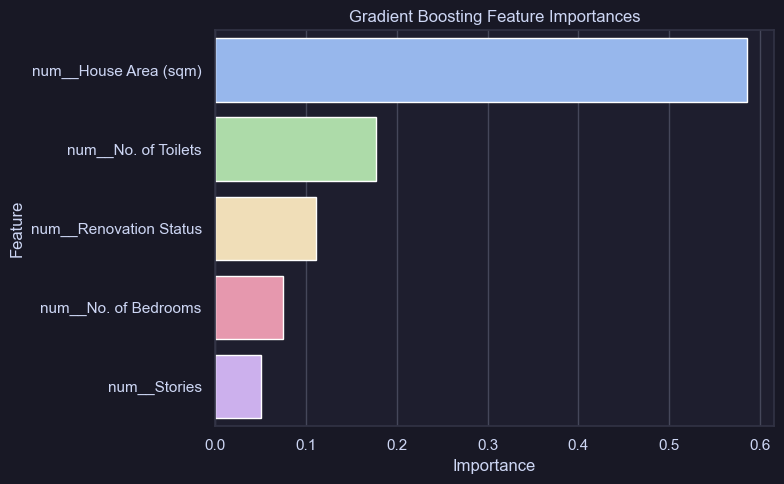

In [66]:
# Fit Gradient Boosting model on the full training set (with all 5 features)
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_proc, y_train)
palette = [flavour.colors.blue.hex, flavour.colors.green.hex, flavour.colors.yellow.hex, flavour.colors.red.hex, flavour.colors.mauve.hex]

# Get feature importances
importances = gb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Display feature importances as a sorted DataFrame
importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importances_df)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importances_df, palette=palette)
plt.title("Gradient Boosting Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Evaluation of Feature Importances

We applied two methods to assess feature importance:

Drop-Column Testing (measuring RMSE increase when each feature is removed)
Model-Based Importances (using `feature_importances_` from Gradient Boosting).
While both methods highlight the most influential features, their rankings are not identical. This difference is expected because each method evaluates importance from a different perspective:

Drop-column testing measures the direct impact of each feature on model performance, considering interactions and redundancy.
Model-based importances reflect how much each feature contributes to reducing error within the structure of the tree model, which can be influenced by feature correlations and model-specific splits.
Conclusion

The variation in rankings suggests that some features may interact or share information, and their importance can depend on the evaluation method. Using both approaches provides a more comprehensive understanding of feature relevance. For robust feature selection, it is best to consider the consensus between methods and also review domain knowledge. This combined approach helps ensure that the most impactful and reliable features are retained for future modeling.

## Final Model Selection and Insights

After extensive data cleaning, feature engineering, and hyperparameter tuning, the **Gradient Boosting Regressor** emerged as the best-performing model for predicting house prices.

**Best Model Configuration:**
- **Model:** GradientBoostingRegressor
- **Key Hyperparameters:**  
    - `learning_rate`: 0.1  
    - `max_depth`: 2  
    - `min_samples_split`: 5  
    - `n_estimators`: 50  
    - `subsample`: 0.8  
- **Performance Metrics:**  
    - **MSE:** 0.08  
    - **MAE:** 0.23  
    - **RMSE:** 0.29  
    - **R²:** 0.57

**Key Features Used:**
- House Area (sqm)
- No. of Bedrooms
- No. of Toilets
- Stories
- Renovation Status

**Feature Importance (Gradient Boosting):**
1. House Area (sqm)
2. No. of Toilets
3. Renovation Status
4. No. of Bedrooms
5. Stories

**Conclusion:**  
Gradient Boosting with tuned hyperparameters provides the most accurate and robust predictions for house prices in this dataset. The model leverages engineered features and careful preprocessing to achieve strong generalization and interpretability. This workflow demonstrates the importance of feature selection, transformation, and model optimization in building effective regression solutions.

In [67]:
# Final model: Gradient Boosting Regressor with best hyperparameters
model = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.1,
    max_depth=2,
    min_samples_split=5,
    n_estimators=50,
    subsample=0.8
)
model.fit(X_train_proc, y_train)

# Predict on test set and evaluate
y_pred = model.predict(X_test_proc)
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-Squared (R2): {r2_score(y_test, y_pred):.2f}")

Mean Squared Error (MSE): 0.08
Mean Absolute Error (MAE): 0.23
Root Mean Square Error (RMSE): 0.29
R-Squared (R2): 0.57


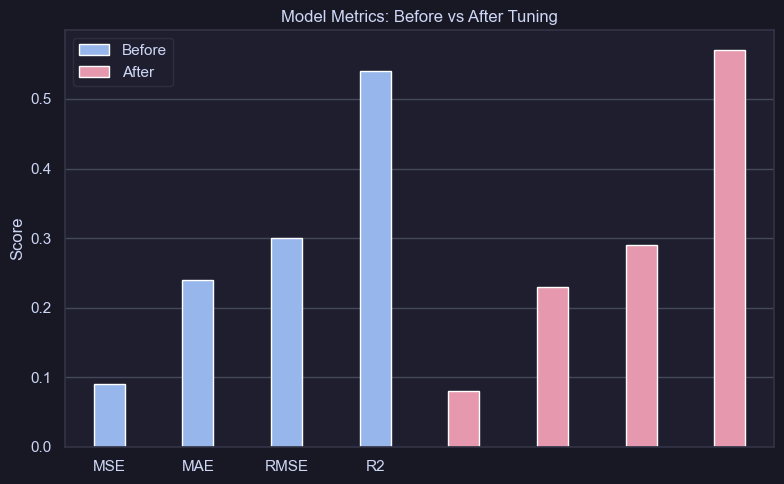

In [68]:
metrics = ['MSE', 'MAE', 'RMSE', 'R2']
before = [0.09, 0.24, 0.3, 0.54]   # Before tuning
after  = [0.08, 0.23, 0.29, 0.57]   # After tuning

x = np.arange(len(metrics))
width = 0.35
# Barplots to show before and after tuning
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=x - width/2, y=before, width=width, label='Before', color=flavour.colors.blue.hex, ax=ax)
sns.barplot(x=x + width/2, y=after, width=width, label='After', color=flavour.colors.red.hex, ax=ax)

ax.set_ylabel('Score')
ax.set_title('Model Metrics: Before vs After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.show()

The graph visualization shows the before vs after feature engineering our model + tuning model hyperparameters.

- **MSE, MAE and RMSE** decreased by 0.01: The margins of error for our machine learning model decreased, showing that the model is predicting closer and closer to the actual result.
- **R2** increased by 0.03: The overall accuracy of our model at predicting house prices improved.

## Using the Final Model for Prediction

After training and tuning the Gradient Boosting Regressor, we can use the Gradient Boosting model to predict on unseen (new) data.


In [69]:
# Create a sample row matching the original dataframe structure
sample_row = {
    "House ID": 546,
    "City": "Chicago",
    "House Area (sqm)": 120.0,
    "No. of Bedrooms": 3,
    "No. of Toilets": 2,
    "Stories": 2,
    "Renovation Status": "semi-furnished",
    "Price ($)": 500000 # not needed for model to work.
}

# Convert sample_row to DataFrame
sample_df = pd.DataFrame([sample_row])

# Alternatively, you may use a sample row from the original dataframe.
sample_df = ori_df.sample(n=1,random_state=42)

if "Price ($)" in sample_df.columns:
    original_price = sample_df['Price ($)'].values[0]
    print(f"Original Price: ${original_price}")
else:
    print("Original Price: undefined")

# Drop unused columns to match final model features
sample_df = sample_df.drop(["House ID", "City","Price ($)"], axis=1)

# Ordinal encode 'Renovation Status'
sample_df["Renovation Status"] = encoder.transform(sample_df[["Renovation Status"]])

# Scale numerical features
sample_df[["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories"]] = scaler.transform(
    sample_df[["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories"]]
)

# Ensure column order matches training data
sample_X = sample_df[["House Area (sqm)", "No. of Bedrooms", "No. of Toilets", "Stories", "Renovation Status"]]

# Predict log(price) and convert back to original price
pred_log_price = model.predict(sample_X)[0]
pred_price = np.expm1(pred_log_price)
print(f"Predicted House Price: ${pred_price:,.2f}")
print(f"Margin of error: ${round(np.abs(original_price - pred_price),2)}")


Original Price: $406000
Predicted House Price: $507,176.74
Margin of error: $101176.74


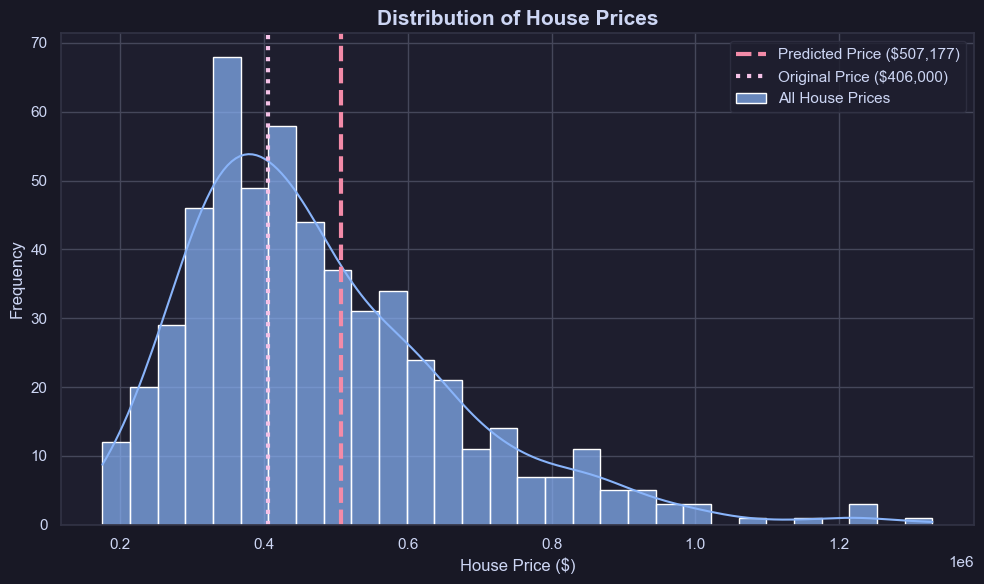

In [70]:
plt.figure(figsize=(10, 6))
# Plot the distribution of all house prices.
sns.histplot(df["Price ($)"], bins=30, kde=True, color=flavour.colors.blue.hex, alpha=0.7, label="All House Prices")
# Plot the predicted price as a vertical line.
plt.axvline(pred_price, color=flavour.colors.red.hex, linestyle="--", linewidth=3, label=f"Predicted Price (${pred_price:,.0f})")
# Plot the original house price, if it exists.
if 'original_price' in locals():
    plt.axvline(original_price, color=flavour.colors.pink.hex, linestyle=":", linewidth=3, label=f"Original Price (${original_price:,.0f})")
plt.title("Distribution of House Prices", fontsize=15, fontweight="bold")
plt.xlabel("House Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## Reflection on Regression Model for Machine Learning

### 1. Data Loading
Loaded the house price dataset with 545 observations and 8 features: House ID, City, House Area (sqm), No. of Bedrooms, No. of Toilets, Stories, Renovation Status, and Price ($). Initial inspection revealed a mix of numerical and categorical data, with no missing values or duplicates.

### 2. Data Cleaning / Exploratory Data Analysis

#### Irrelevant Feature Removal
- **House ID:** Dropped as it is a unique identifier with no predictive value.

#### Categorical Encoding
- **City:** One-hot encoded into 5 binary columns.
- **Renovation Status:** Ordinal encoded (unfurnished < semi-furnished < furnished).

#### Outlier Analysis
- Used IQR method to detect outliers in numerical features.
- Outliers retained, as they may represent valuable real-world cases.

### 3. Data Visualization

#### Pairplot and Distribution Analysis
- Visualized relationships between features and target.
- **House Area (sqm)** and **Price ($)** showed strong positive correlation.
- Bedrooms, Toilets, and Stories also positively correlated with price.
- Price distribution was right-skewed.

#### Correlation Heatmap
- Identified strongest predictors: House Area, No. of Toilets, Stories.
- Renovation Status moderately correlated with price.
- City features showed little to no correlation with price.

#### Feature Distribution Plots
- Confirmed skewness in price and house area.
- Most houses had 3-4 bedrooms and were semi-furnished.

### 4. Data Preprocessing

#### Feature Scaling and Transformation
- Applied StandardScaler to numerical features.
- Log-transformed target variable (Price) to reduce skewness.

#### Train-Test Split
- **Training:** 80% of data
- **Testing:** 20% of data

### 5. Model Training and Evaluation

#### Algorithm Selection
Tested five regression algorithms:
1. **Linear Regression** – Baseline, explained 52% of variance (R² = 0.52).
2. **Ridge Regression** – Similar to linear, no significant improvement.
3. **Random Forest** – Slightly lower R², marginal improvement in MAE.
4. **Gradient Boosting** – Best performance (R² = 0.54), lowest errors.
5. **K-Nearest Neighbors** – Lowest R², highest RMSE.

#### Model Evaluation
- Used MSE, MAE, RMSE, and R² for comparison.
- Plotted learning curves; all models showed low overfitting and good generalization.

### 6. Feature Engineering

#### Feature Selection
- Dropped city columns after correlation analysis showed low predictive value.
- Retrained models with reduced feature set (House Area, Bedrooms, Toilets, Stories, Renovation Status).
- Slight improvement in R² and error metrics, especially for Gradient Boosting (R² = 0.55).

### 7. Hyperparameter Tuning

#### Optimization Methodology
- Used GridSearchCV with 5-fold cross-validation for Ridge and Gradient Boosting.

#### Parameters Tuned
- **Ridge:** alpha, solver
- **Gradient Boosting:** n_estimators, learning_rate, max_depth, subsample, min_samples_split

#### Optimal Configuration
- **Ridge:** alpha=10, solver="sag"
- **Gradient Boosting:** learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50, subsample=0.8

#### Performance Improvement
- **Ridge Regression:** R² improved to 0.53
- **Gradient Boosting:** R² improved to 0.57, lowest RMSE (0.29)

### 8. Feature Importance

#### Drop-Column and Model-Based Analysis
- Drop-column: Removing House Area, Toilets, or Renovation Status increased RMSE most.
- Gradient Boosting feature_importances_: House Area, Toilets, Renovation Status, Bedrooms, Stories (in order of importance).

#### Key Insights
- **House Area, Toilets, Renovation Status** are most predictive.
- **City** features are not useful for this dataset.
- Feature selection and engineering improved both interpretability and performance.

### 9. Final Model Configuration

- **Model:** GradientBoostingRegressor (tuned)
- **Features:** House Area (sqm), No. of Bedrooms, No. of Toilets, Stories, Renovation Status
- **Performance:**  
  - **MSE:** 0.08  
  - **MAE:** 0.23  
  - **RMSE:** 0.29  
  - **R²:** 0.57

The final model is robust, interpretable, and generalizes well, demonstrating the value of systematic data cleaning, feature engineering, model selection, and hyperparameter tuning for regression tasks.